# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [14]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [15]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 1595

#### Question 2. Create a summary table

In [16]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [17]:
lm = smf.ols(formula='admit ~ gre + gpa + prestige', data=df_raw).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           1.65e-08
Time:                        15:37:08   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE values have much larger disparity between the MIN and MAX values, so the absolute values will naturally be farther apart.

#### Question 4. Drop data points with missing data


In [8]:
df_clean = df_raw.dropna()
print df_clean.count()
df_clean.head()


admit       397
gre         397
gpa         397
prestige    397
dtype: int64


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I counted the rows in each axis of the data to make sure the number of rows is the same. Based on the documentation, I think dropna() eliminates the rows with N/A entirely, so i dont need to be worried about shifting rows and their relations to eachother

#### Question 6. Create box plots for GRE and GPA

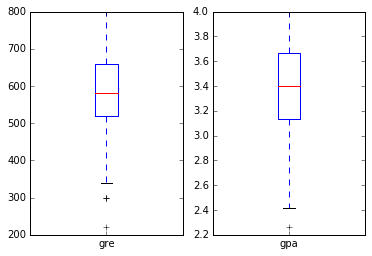

In [9]:
#boxplot 1
fig, axs = plt.subplots(1, 2, sharey=False)
df_clean.plot(kind='box', x='admit', y='gre', ax = axs[0])
df_clean.plot(kind='box', x='admit', y='gpa', ax = axs[1])


In [10]:
#boxplot 2 -- see above


#### Question 7. What do this plots show?

Answer: The distribution of data points is broader compared to the median for GPA. Also, there are more outliers skewing the GRE data. Last thing I'd say immediate is that both have a finite bound at te top (800 and 4.0 respectively), so it makes sense to see outliers  skew towards the bottom. There is a finite bound at the bottom two, but presumably it is much less probably to have anyone end up with 0's for either of those stats.

#### Question 8. Describe each distribution 

(array([  4.34291670e-05,   1.30287501e-04,   6.94866672e-04,
          1.21601668e-03,   2.17145835e-03,   3.25718753e-03,
          3.51776253e-03,   2.77946669e-03,   1.91088335e-03,
          1.52002085e-03]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

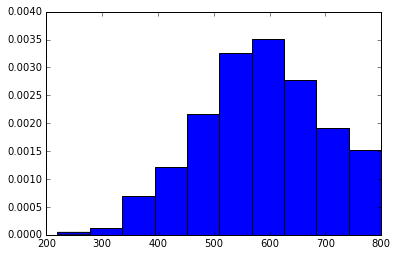

In [11]:
# plot the distribution of each variable 

gre_d = df_clean['gre'].copy()
gre_d.sort_values(inplace=True)
std_gre = gre_d.std()
mean_gre = gre_d.mean()
plt.hist(gre_d,normed=True)



#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

(array([ 0.04342917,  0.05790556,  0.23162222,  0.46324445,  0.60800834,
         0.82515417,  1.10020556,  0.94096529,  0.56457917,  0.91201251]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

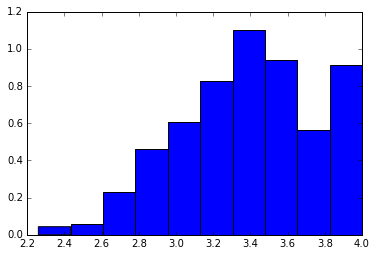

In [81]:
#No, it would not work for this distribution I dont

gpa_d = df_clean['gpa'].copy()
gpa_d.sort_values(inplace=True)
std_gpa = gpa_d.std()
mean_gpa = gpa_d.mean()
plt.hist(gpa_d,normed=True)

(array([ 0.51217464,  0.        ,  0.        ,  1.24265323,  0.        ,
         0.        ,  1.01595298,  0.        ,  0.        ,  0.56255248]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

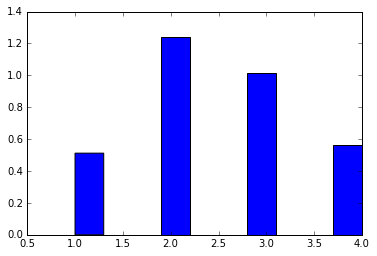

In [82]:
pre_d = df_clean['prestige'].copy()
pre_d.sort_values(inplace=True)
std_pre = pre_d.std()
mean_pre = pre_d.mean()
plt.hist(pre_d,normed=True)

Answer: No, because GPA spikes at 4.0, and a normal distribution would have a single peak.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, to be more normal you would need to exclude certain outliers that pull the distribution to the left.

#### Question 11. Which of our variables are potentially colinear? 

In [13]:
# create a correlation matrix for the data
corr = df_clean.corr()
print corr

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are potentially colinear, but I think I would generally say non correlate well.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: My first step would be controlling for differences in other values other than prestige in the data I would analyse. That is, I would bucket people by GRE score and GPA to control for other influential factors. Then I would look for variation within the prestige and see if there is a correlation between prestige and admittance. I would also probably create dummy variables for each prestige level to make sure there was no influence of big numbers vs. small numbers, but I dont think that would be a big factor as it should already be controlled for by the boolean admit field.

#### Question 14. What is your hypothesis? 

Answer: My null hypothesis would be that there is no correlation between prestige and admittance. My alternate hypothesis is that there is some correlation between undergrad school prestige and admittance.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Fill in with dummy data. That is, take the average value of the missing field based on others who have the same value in filled in fields. For example, if GPA is missing, look at students with the same admission score, GRE, and Prestige, and use their average GPA.

#### 2. Bonus: Log transform the skewed data

In [20]:
np.log(df_clean).head()

,admit,gre,gpa,prestige
0,-inf,5.940171,1.283708,1.098612
1,0.000000,6.492240,1.300192,1.098612
2,0.000000,6.684612,1.386294,0.000000
3,0.000000,6.461468,1.160021,1.386294
4,-inf,6.253829,1.075002,1.386294


#### 3. Advanced: Impute missing data